## Importing important libraries

In [97]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.cluster import KMeans
import plotly.figure_factory as ff


c:\Users\trust\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning:

Blowfish has been deprecated



## Exploring the Data

In [38]:
df = pd.read_csv("Mall_Customers.csv")

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.duplicated().value_counts()

False    200
dtype: int64

In [40]:
df.drop(columns=['CustomerID'],inplace=True)

In [22]:
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

### Exploring features

<Axes: xlabel='Gender', ylabel='Count'>

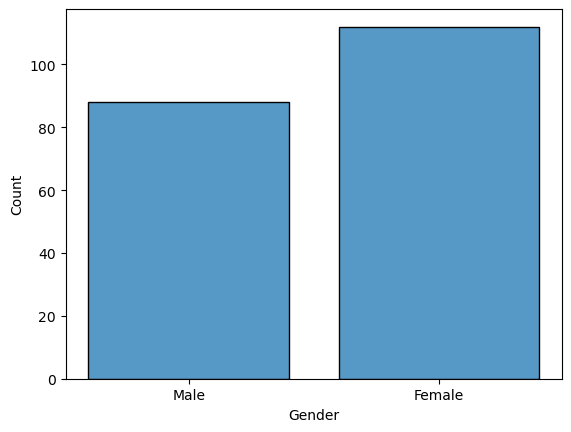

In [21]:
# Creating a figure with subplots

# Histogram
sns.histplot(df['Gender'],shrink=0.8)


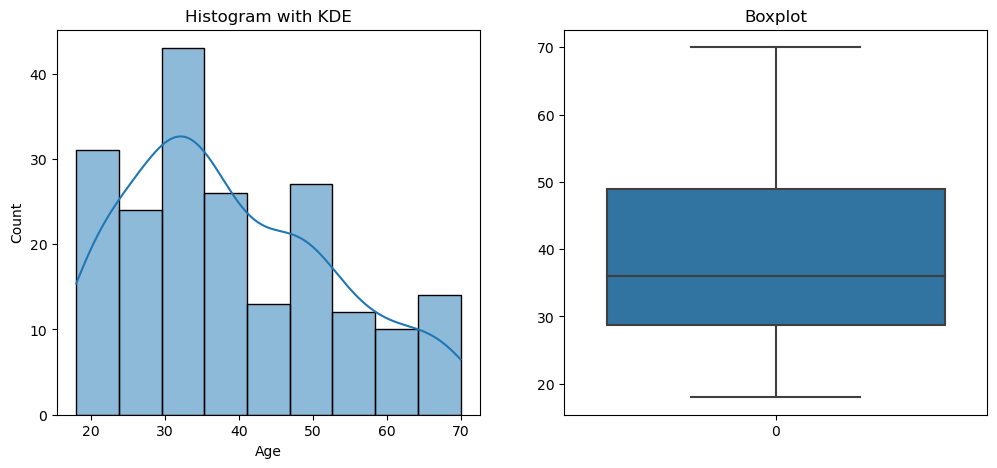

In [9]:
# Creating a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns for the plots

# Histogram with KDE
sns.histplot(df['Age'], kde=True, ax=axes[0])
axes[0].set_title('Histogram with KDE')

# Boxplot
sns.boxplot(df['Age'], ax=axes[1])
axes[1].set_title('Boxplot')


plt.show()


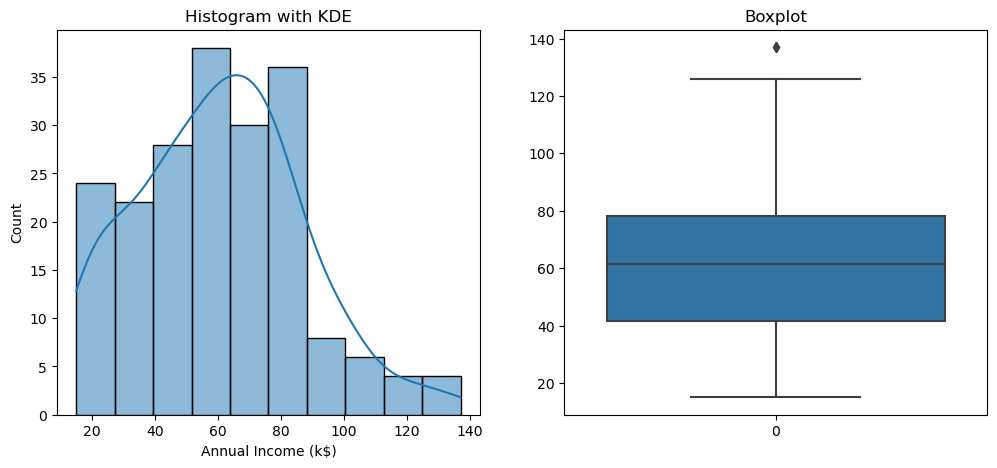

In [10]:
# Creating a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns for the plots

# Histogram with KDE
sns.histplot(df['Annual Income (k$)'], kde=True, ax=axes[0])
axes[0].set_title('Histogram with KDE')

# Boxplot
sns.boxplot(df['Annual Income (k$)'], ax=axes[1])
axes[1].set_title('Boxplot')


plt.show()


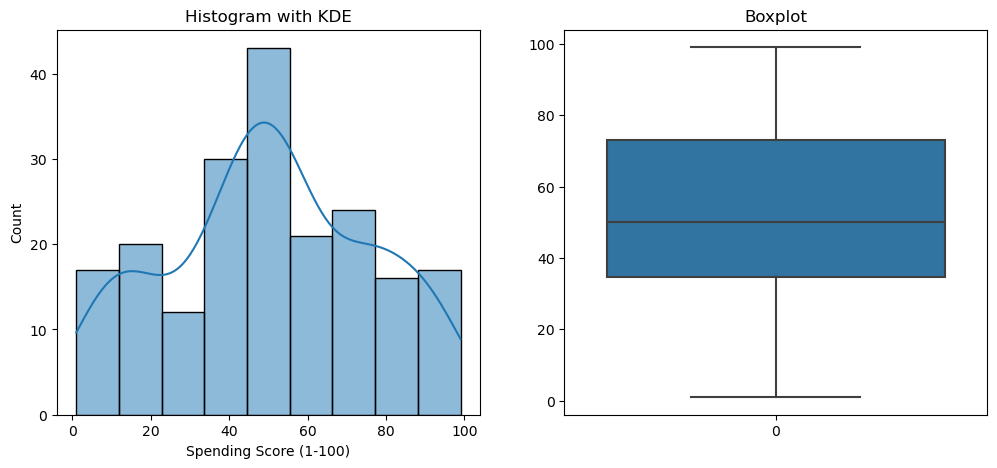

In [11]:
# Creating a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns for the plots

# Histogram with KDE
sns.histplot(df['Spending Score (1-100)'], kde=True, ax=axes[0])
axes[0].set_title('Histogram with KDE')

# Boxplot
sns.boxplot(df['Spending Score (1-100)'], ax=axes[1])
axes[1].set_title('Boxplot')


plt.show()


In [41]:
from sklearn.preprocessing import LabelEncoder

# Encode 'Gender' column to numerical values
label_encoder = LabelEncoder()
df['Gender_Encoded'] = label_encoder.fit_transform(df['Gender'])

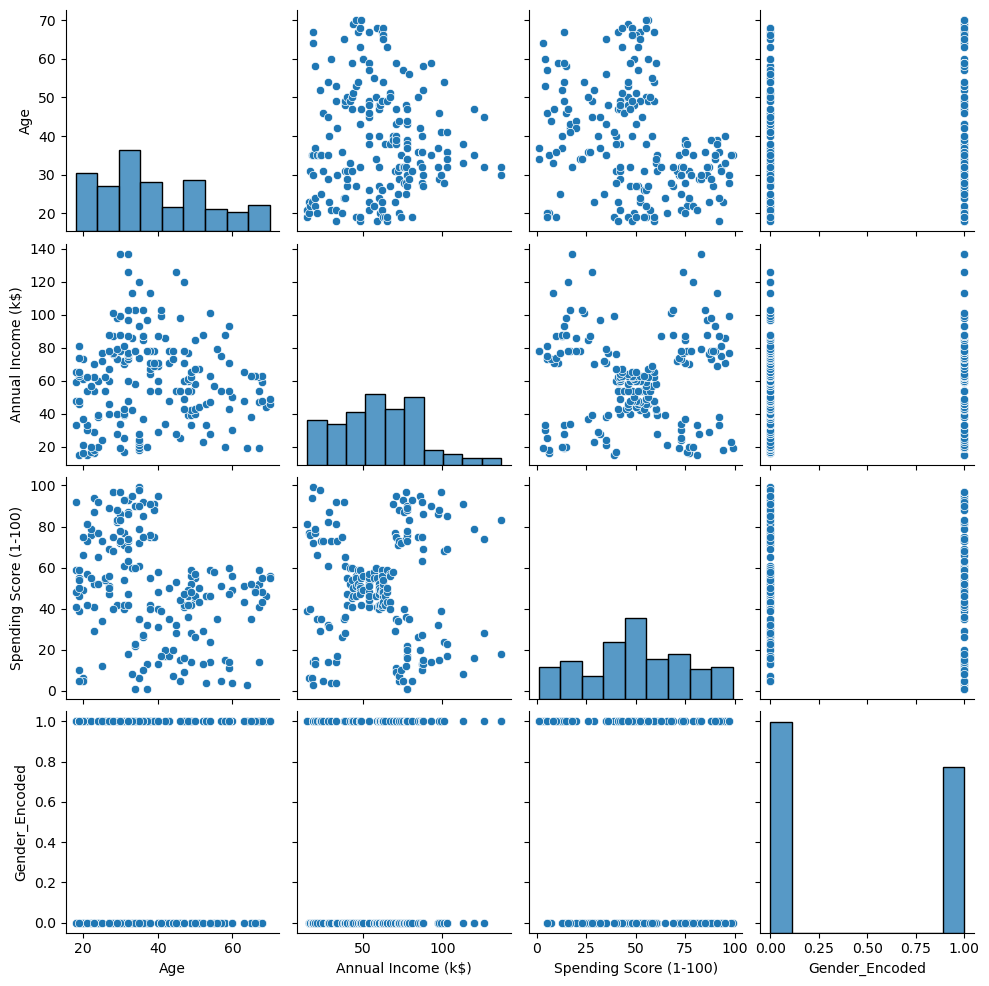

In [42]:
#plotting scatter plots between features to see their distribution
sns.pairplot(df, diag_kind='hist')
plt.show()


### Findings
* It is meaningless to cluster by using gender now.
* I need to cluster the data to achieve business goals of choosing our target customers





## Using K-means clustering algorithm

### Using elbow method to know the number of clusters

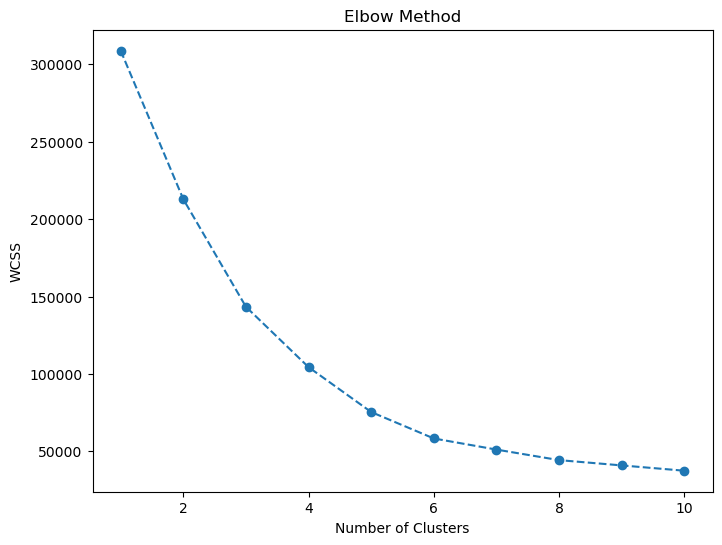

In [44]:


# Select relevant columns for clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42 ,n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method to find the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # Within-cluster sum of squares
plt.show()


It is not obvious where exactly the elbow is on the curve but it is likely a number from 4 to 6.

### Using Silhouette Analysis

For n_clusters = 2, the average silhouette score is: 0.293166070535953
For n_clusters = 3, the average silhouette score is: 0.3839349967742105
For n_clusters = 4, the average silhouette score is: 0.40546302077733304
For n_clusters = 5, the average silhouette score is: 0.44446409171786105
For n_clusters = 6, the average silhouette score is: 0.4523566166018854
For n_clusters = 7, the average silhouette score is: 0.4398198217929885
For n_clusters = 8, the average silhouette score is: 0.42977587111050725
For n_clusters = 9, the average silhouette score is: 0.41443894953771165
For n_clusters = 10, the average silhouette score is: 0.3771617663736055


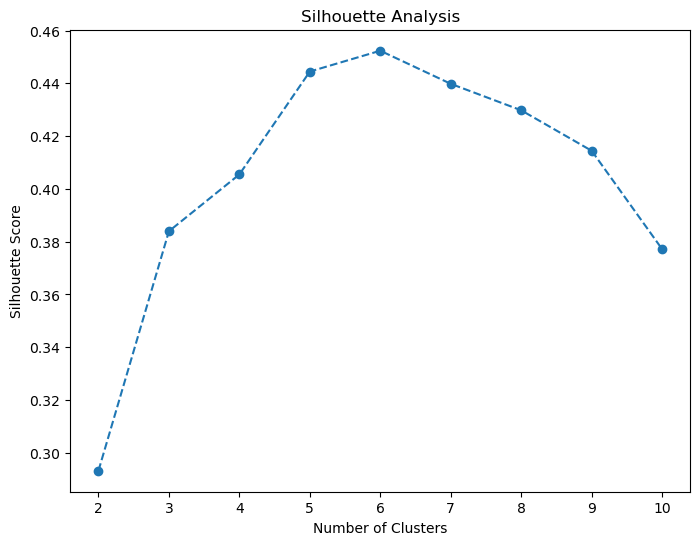

In [45]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is: {silhouette_avg}")

# Plotting the silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Analysis')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


The number is 6, let's try clustering based on this number!

c:\Users\trust\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



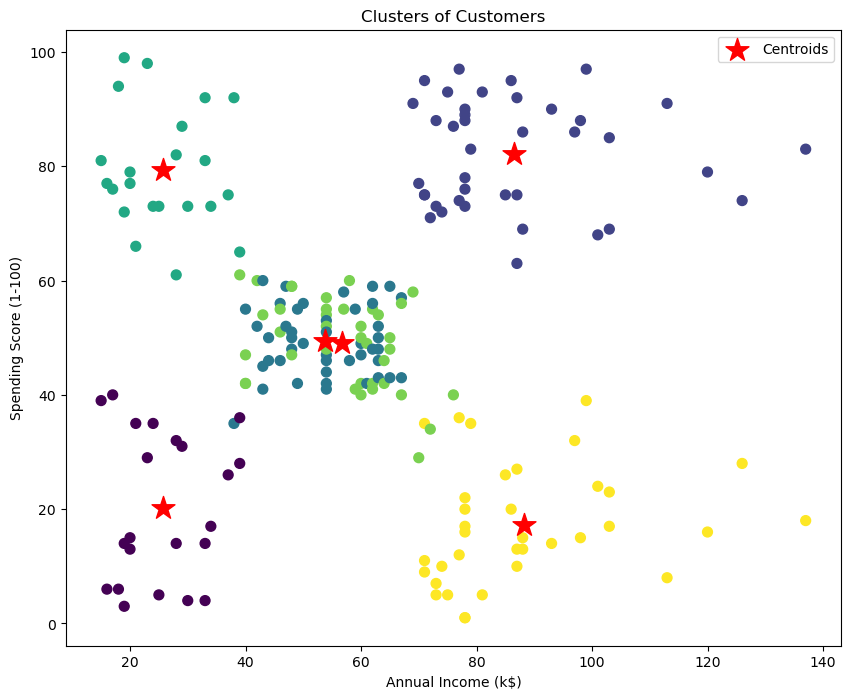

In [57]:
# Applying K-means clustering with the optimal number of clusters
optimal_number_of_clusters = 6
kmeans = KMeans(n_clusters=optimal_number_of_clusters, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X)

# Add the cluster labels to the original dataset
df['Cluster'] = clusters

# Visualizing the clusters
plt.figure(figsize=(10, 8))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=clusters, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=300, c='red', marker='*', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters of Customers')
plt.legend()
plt.show()


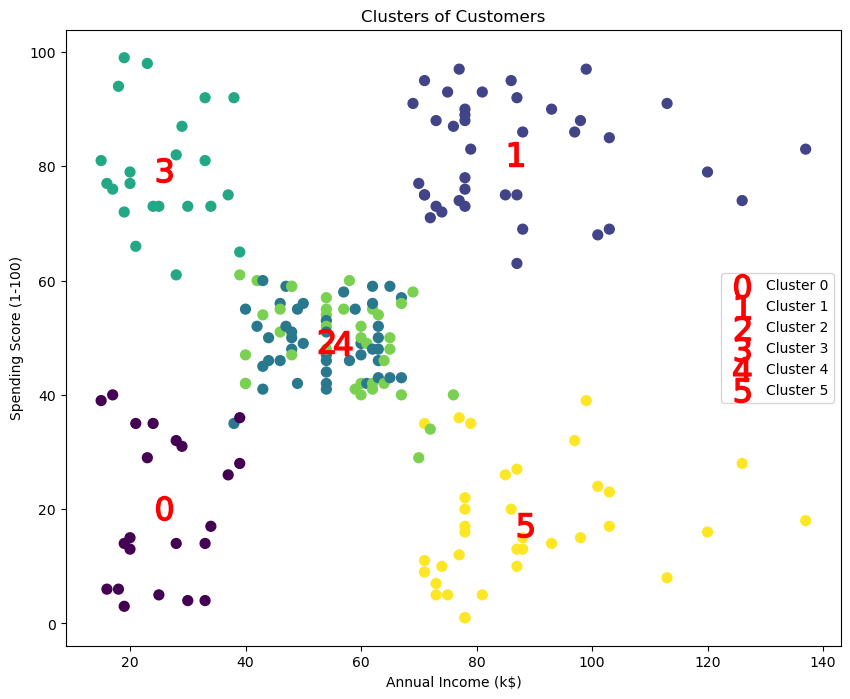

In [70]:
# Visualizing the clusters with cluster numbers instead of stars for centroids
plt.figure(figsize=(10, 8))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=clusters, cmap='viridis', s=50)

# Plotting centroids with cluster numbers
for i, centroid in enumerate(kmeans.cluster_centers_):
    #plt.text(centroid[1], centroid[2], f'{i}', fontsize=12, ha='center', va='center', color='red', weight='bold')
    plt.scatter(centroid[1], centroid[2], s=300, c='red', label=f'Cluster {i}', marker=f'${i}$')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters of Customers')
plt.legend()
plt.show()

### Findings:
Clusters according to spending score and annual income are:
* Cluster **0**: Low income - Low Spend (Conservative)(محافظ )
* Cluster **1**: High income - High Spend (Affluent)(غني )
* Cluster **2,4**: Moderate income - Moderate Spend (Balanced)(متوازن )
* Cluster **3**: Low income - High Spend (Extravagant)(مسرف )
* Cluster **5**: High income - Low Spend (Reserved)(بخيل :[ ) 

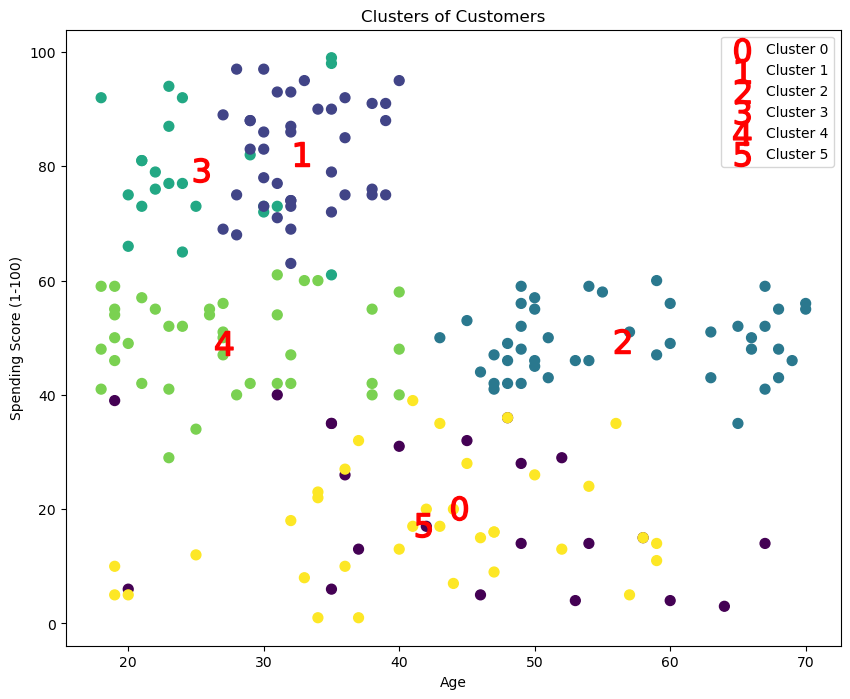

In [109]:
# Visualizing the clusters with cluster numbers instead of stars for centroids
plt.figure(figsize=(10, 8))
plt.scatter(X['Age'], X['Spending Score (1-100)'], c=clusters, cmap='viridis', s=50)

# Plotting centroids with cluster numbers
for i, centroid in enumerate(kmeans.cluster_centers_):
    #plt.text(centroid[1], centroid[2], f'{i}', fontsize=12, ha='center', va='center', color='red', weight='bold')
    plt.scatter(centroid[0], centroid[2], s=300, c='red', label=f'Cluster {i}', marker=f'${i}$')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters of Customers')
plt.legend()
plt.show()

### Findings:
Clusters according to Age:
* Clusters **1,3,4**: Younger
* Cluster **2**: Older
* Cluster **0,5**: All ages

c:\Users\trust\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



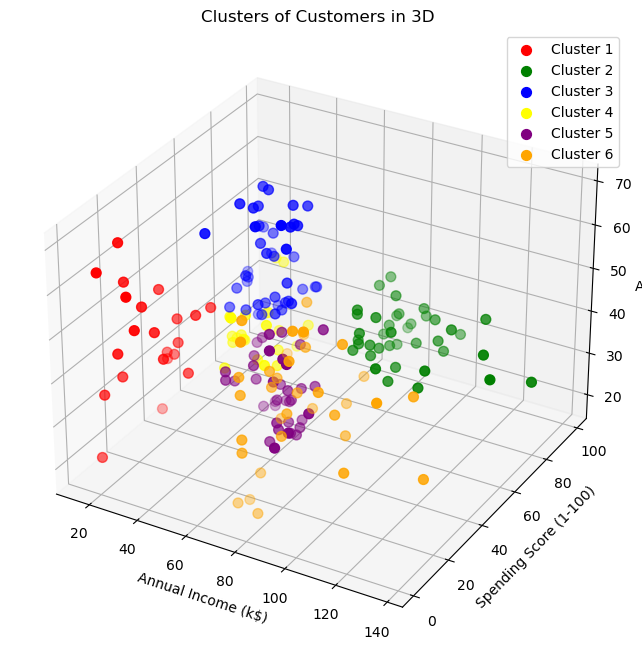

In [79]:
from mpl_toolkits.mplot3d import Axes3D

# Perform K-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_number_of_clusters, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X)

# Add the cluster labels to the original dataset
df['Cluster'] = clusters

# Visualizing the clusters in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['red', 'green', 'blue', 'yellow', 'purple', 'orange', 'cyan', 'magenta', 'brown', 'black']

for cluster_num in range(optimal_number_of_clusters):
    cluster_data = df[df['Cluster'] == cluster_num]
    ax.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], cluster_data['Age'],
               c=colors[cluster_num], label=f'Cluster {cluster_num + 1}', s=50)

ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')
ax.set_zlabel('Age')
ax.set_title('Clusters of Customers in 3D')
ax.legend()
plt.show()


In [81]:
import plotly.express as px

# Assuming 'data' contains the DataFrame with the clustered information

fig = px.scatter_3d(df, x='Annual Income (k$)', y='Spending Score (1-100)', z='Age', color='Cluster',
                     opacity=0, size_max=10)
fig.update_layout(title='3D Customer Segmentation')
fig.show()


### **Clusters labels are (Age - Annualy Income - Spending Score):**

* Cluster **0**: All ages - Low income - Low Spend(**Conservative**)
* Cluster **1**: Younger - High income - High Spend(**Young rich**)
* Cluster **2**: Older - Moderate income - Moderate Spend(**Old Balanced**)
* Cluster **3**: Younger - Low income - High Spend(**Young Extravagant**)
* Cluster **4**: Younger - Moderate income - Moderate Spend(**Young Balanced**)
* Cluster **5**: All ages - High income - Low Spend(**Reserved**)

Conservative remain conservative at all ages and reserved remain reserved at all ages ;)

;) البخيل طول عمره بخيل والفقير طول عمره فقير 


## Let's do some analysis!

* ### Gender analysis:

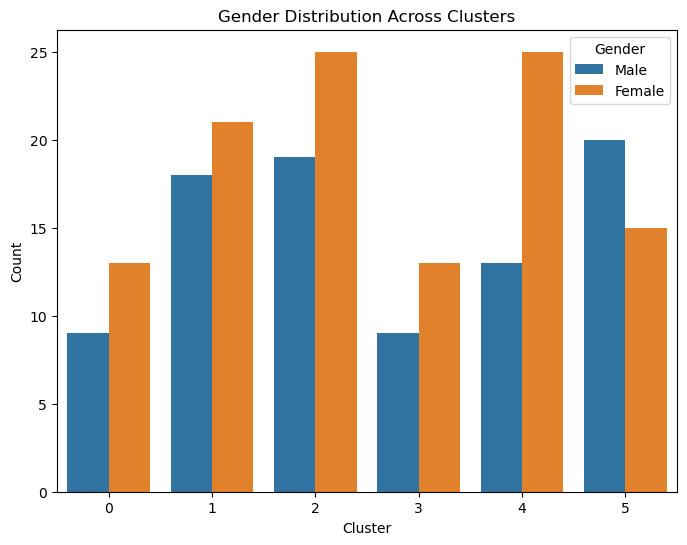

In [93]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster', hue='Gender', data=df)
plt.title('Gender Distribution Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

### Findings:
* Only Cluster 5(High income - Low Spend) have larger male ratios, and this makes sense as girls tends to spend more especially when they have high income.
* Cluster 4(Younger - Moderate income - Moderate Spend) have much more Females than Males, and this indicates that at younger ages males tend to spend more.

* ### Checking distribustions among clusters and checking outliers

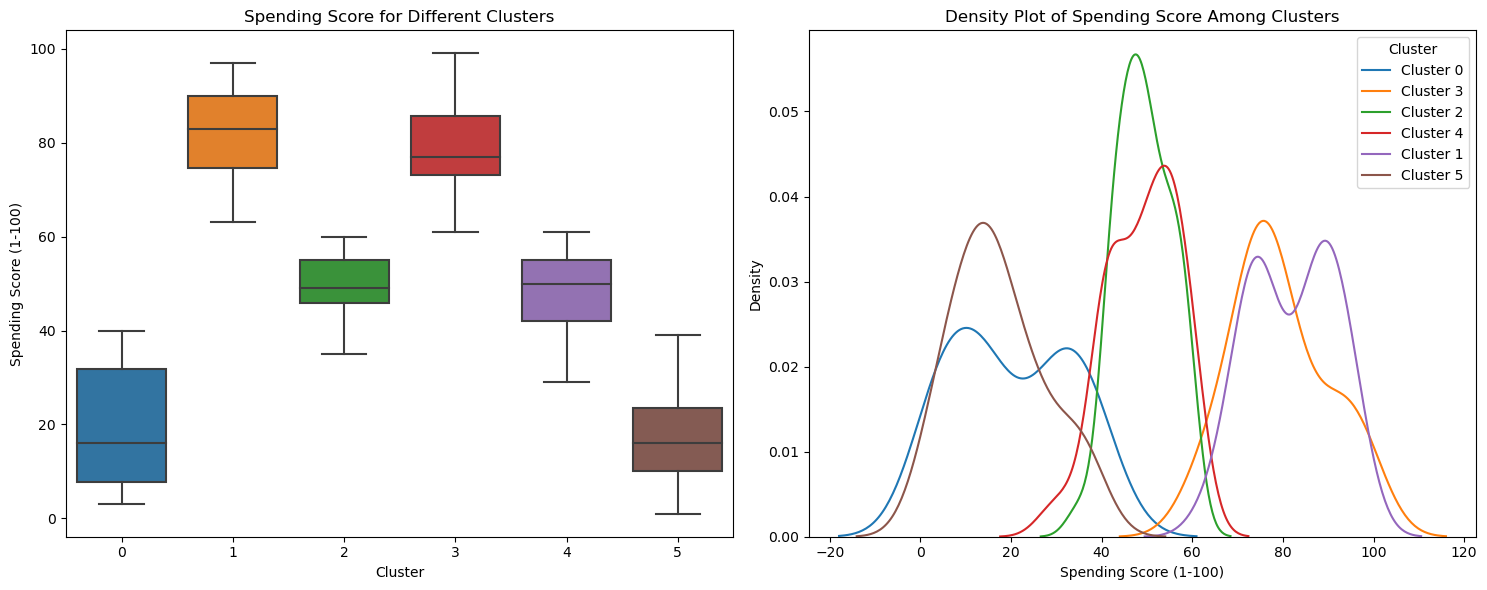

In [105]:
# Subplot for the box plot
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=df)
plt.title('Spending Score for Different Clusters')
plt.xlabel('Cluster')
plt.ylabel('Spending Score (1-100)')

# Subplot for the density plot
plt.subplot(1, 2, 2)
for cluster in df['Cluster'].unique():
    sns.kdeplot(df[df['Cluster'] == cluster]['Spending Score (1-100)'], label=f'Cluster {cluster}')

plt.title('Density Plot of Spending Score Among Clusters')
plt.xlabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


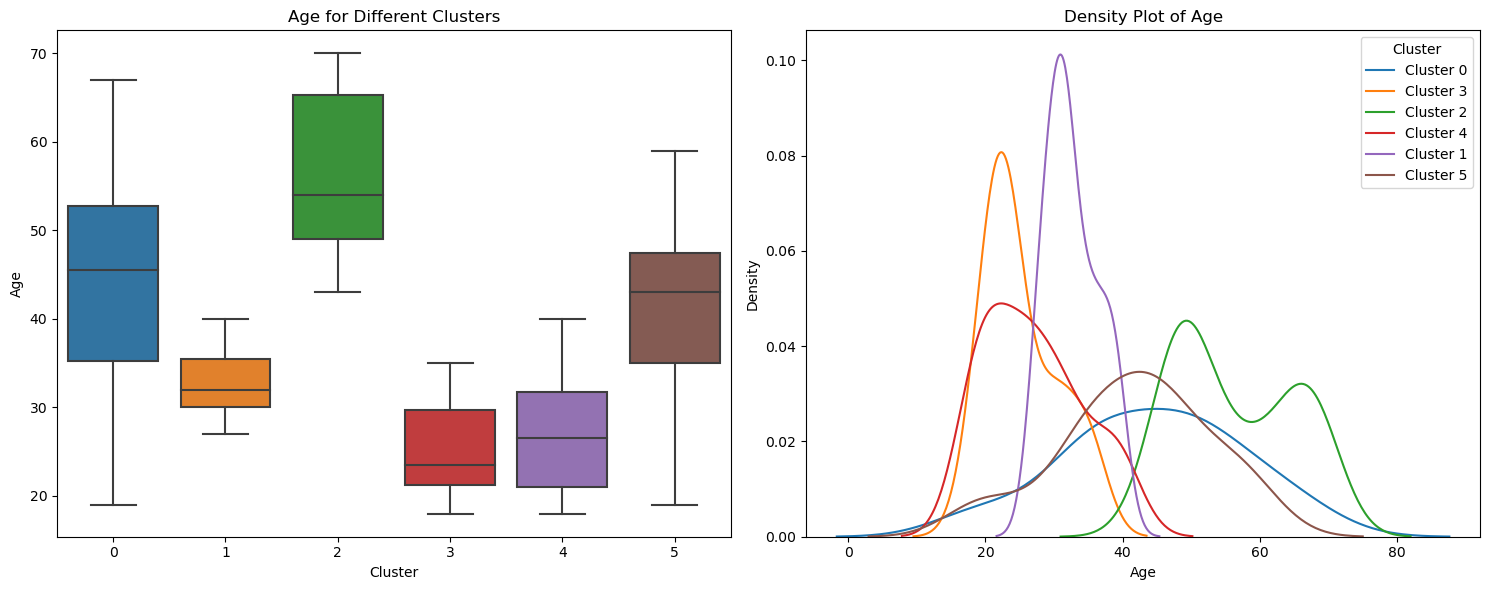

In [110]:
# Subplot for the box plot
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Cluster', y='Age', data=df)
plt.title('Age for Different Clusters')
plt.xlabel('Cluster')
plt.ylabel('Age')

# Subplot for the density plot
plt.subplot(1, 2, 2)
for cluster in df['Cluster'].unique():
    sns.kdeplot(df[df['Cluster'] == cluster]['Age'], label=f'Cluster {cluster}')

plt.title('Density Plot of Age')
plt.xlabel('Age')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()



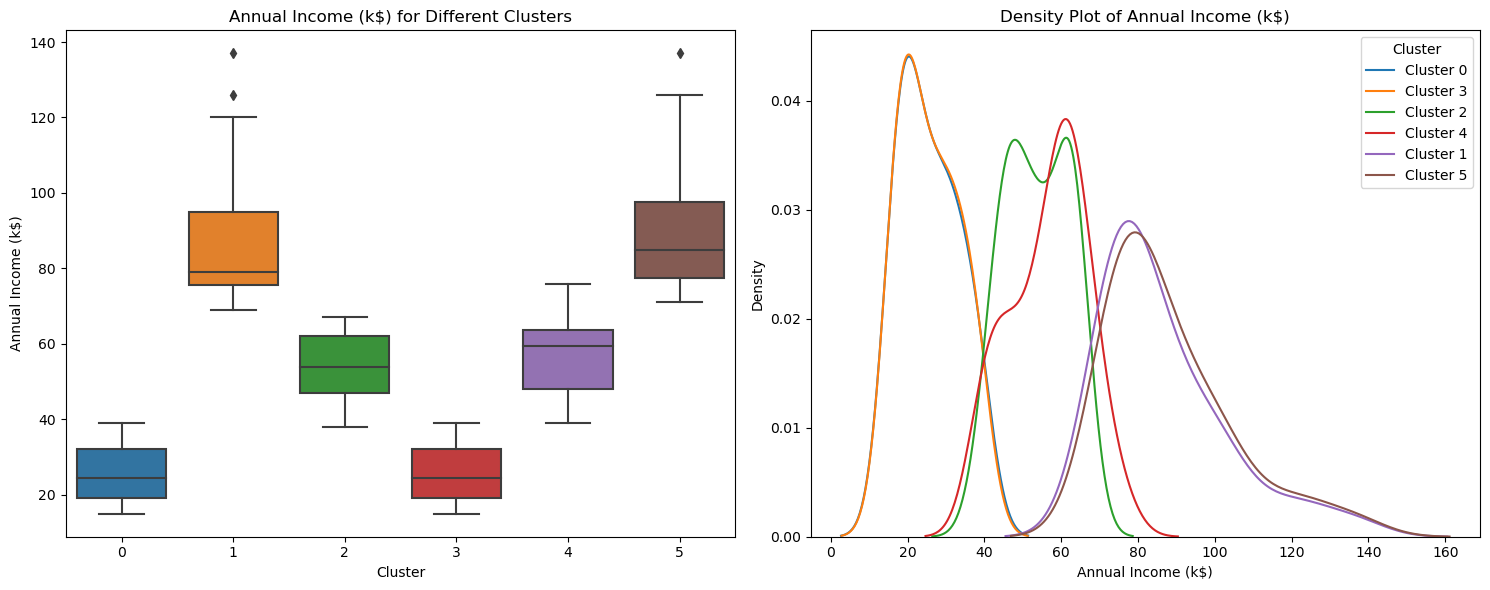

In [112]:
# Subplot for the box plot
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Cluster', y='Annual Income (k$)', data=df)
plt.title('Annual Income (k$) for Different Clusters')
plt.xlabel('Cluster')
plt.ylabel('Annual Income (k$)')

# Subplot for the density plot
plt.subplot(1, 2, 2)
for cluster in df['Cluster'].unique():
    sns.kdeplot(df[df['Cluster'] == cluster]['Annual Income (k$)'], label=f'Cluster {cluster}')

plt.title('Density Plot of Annual Income (k$)')
plt.xlabel('Annual Income (k$)')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()




## Conclusions:
* Our target is mainly the customers from reserved class (cluster 5), We need to make them spend more.
* Older ages customers in clusters(1,3,5) have low spending scores, we have to put more effort on them.